Path to dataset files: /kaggle/input/leapgestrecog
Total images found: 40000
Classes (sample): ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
                                            filepath label
0  /kaggle/input/leapgestrecog/leapGestRecog/07/0...  02_l
1  /kaggle/input/leapgestrecog/leapGestRecog/07/0...  02_l
2  /kaggle/input/leapgestrecog/leapGestRecog/07/0...  02_l
3  /kaggle/input/leapgestrecog/leapGestRecog/07/0...  02_l
4  /kaggle/input/leapgestrecog/leapGestRecog/07/0...  02_l
Detected 10 gesture classes.
Train: 28000 | Val: 6000 | Test: 6000


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,970 (16.36 MB)

 Trainable params: 4,288,970 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 153s 168ms/step - accuracy: 0.7597 - loss: 0.7091 - val_accuracy: 0.9972 - val_loss: 0.0171 - learning_rate: 0.0010
Epoch 2/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 116s 73ms/step - accuracy: 0.9774 - loss: 0.0728 - val_accuracy: 0.9968 - val_loss: 0.0105 - learning_rate: 0.0010
Epoch 3/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 81s 73ms/step - accuracy: 0.9864 - loss: 0.0466 - val_accuracy: 0.9987 - val_loss: 0.0034 - learning_rate: 0.0010
Epoch 4/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - accuracy: 0.9906 - loss: 0.0281 - val_accuracy: 0.9983 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 5/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 64s 73ms/step - accuracy: 0.9928 - loss: 0.0246 - val_accuracy: 0.9997 - val_loss: 7.1506e-04 - learning_rate: 0.0010
Epoch 6/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - accuracy: 0.9933 - loss: 0.0217 - val_accuracy: 0.9997 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 7/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 83s 73ms/step - accuracy: 0.9

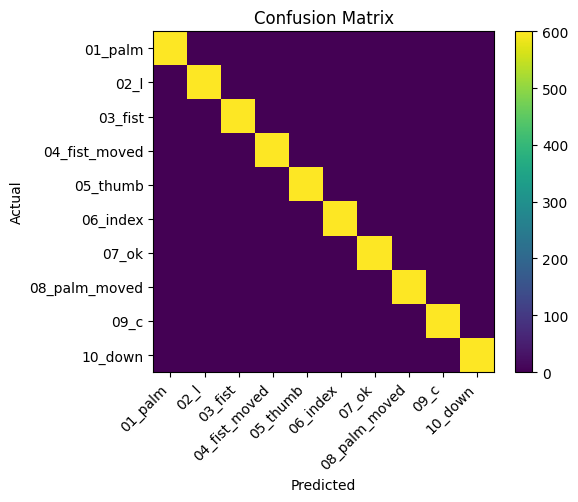

Saved model to /content/exports/hand_gesture_cnn.keras
Saved label map to /content/exports/label_map.csv


In [1]:
# =========================
# Task 4: Hand Gesture Recognition (LeapGestRecog)
# - Downloads dataset via kagglehub (no local PC download needed)
# - Builds tf.data pipeline from discovered files
# - Trains a compact CNN
# - Reports accuracy + classification report
# =========================

!pip -q install kagglehub

import os
import glob
import random
import numpy as np
import pandas as pd
import kagglehub

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# -------------------------
# 1) Download dataset via kagglehub
# -------------------------
path = kagglehub.dataset_download("gti-upm/leapgestrecog")
print("Path to dataset files:", path)

# -------------------------
# 2) Discover images and labels
#    We’ll recursively find all image files and use the immediate parent
#    folder name as the class label. This is robust to different nestings.
# -------------------------
IMG_EXTS = ('.png', '.jpg', '.jpeg', '.bmp')
all_files = []
for ext in IMG_EXTS:
    all_files += glob.glob(os.path.join(path, "**", f"*{ext}"), recursive=True)

if not all_files:
    raise RuntimeError(
        "No images found. Open the directory printed above, check the nesting, "
        "and ensure the dataset contains image files."
    )

def parent_dir_label(fp: str) -> str:
    # Class name = immediate parent folder of the image file
    return os.path.basename(os.path.dirname(fp))

filepaths = []
labels = []
for fp in all_files:
    cls = parent_dir_label(fp)
    filepaths.append(fp)
    labels.append(cls)

df = pd.DataFrame({"filepath": filepaths, "label": labels})
# Basic cleanup: drop any empties
df = df[(df["filepath"].str.len() > 0) & (df["label"].str.len() > 0)].reset_index(drop=True)

# Some LeapGestRecog mirrors have a top folder name repeating (like "leapGestRecog"),
# which is fine—class folders still sit one level above each image. This approach handles both.

print("Total images found:", len(df))
print("Classes (sample):", sorted(df["label"].unique())[:20])
print(df.head())

# -------------------------
# 3) Train/Val/Test split (stratified)
# -------------------------
SEED = 42
test_size = 0.15
val_size  = 0.15

le = LabelEncoder()
df["y"] = le.fit_transform(df["label"])
class_names = list(le.classes_)
num_classes = len(class_names)
print(f"Detected {num_classes} gesture classes.")

# First split off test
df_trainval, df_test = train_test_split(
    df, test_size=test_size, random_state=SEED, stratify=df["y"]
)
# Then split train/val from the remainder
val_ratio_of_trainval = val_size / (1.0 - test_size)
df_train, df_val = train_test_split(
    df_trainval, test_size=val_ratio_of_trainval, random_state=SEED, stratify=df_trainval["y"]
)

print(f"Train: {len(df_train)} | Val: {len(df_val)} | Test: {len(df_test)}")

# -------------------------
# 4) tf.data input pipeline from filepaths
# -------------------------
AUTOTUNE = tf.data.AUTOTUNE
IMG_SIZE = (128, 128)  # gestures are simple; 128x128 works well
BATCH_SIZE = 32

# Build lookup table: label string -> integer id via LabelEncoder already
label_to_id = {cls: i for i, cls in enumerate(class_names)}
id_to_label = {i: cls for cls, i in label_to_id.items()}

def preprocess_image(path_str, label_id):
    # Load, decode, resize, and scale [0,1]
    img = tf.io.read_file(path_str)
    img = tf.io.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32) / 255.0
    return img, tf.cast(label_id, tf.int32)

def make_ds(df_subset, shuffle=False):
    paths = df_subset["filepath"].values
    y_ids = df_subset["y"].values
    ds = tf.data.Dataset.from_tensor_slices((paths, y_ids))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df_subset), seed=SEED, reshuffle_each_iteration=True)
    ds = ds.map(lambda p, y: preprocess_image(p, y), num_parallel_calls=AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return ds

train_ds = make_ds(df_train, shuffle=True)
val_ds   = make_ds(df_val, shuffle=False)
test_ds  = make_ds(df_test, shuffle=False)

# -------------------------
# 5) Model: compact CNN + Augment
# -------------------------
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
])

def build_cnn(num_classes: int):
    inputs = layers.Input(shape=(*IMG_SIZE, 3))
    x = data_augmentation(inputs)

    x = layers.Conv2D(32, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Dropout(0.25)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.25)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = models.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = build_cnn(num_classes)
model.summary()

# -------------------------
# 6) Train
# -------------------------
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks,
    verbose=1
)

# -------------------------
# 7) Evaluate + Classification Report
# -------------------------
# Collect predictions on test set
y_true = []
y_prob = []
for batch_imgs, batch_labels in test_ds:
    preds = model.predict(batch_imgs, verbose=0)
    y_prob.append(preds)
    y_true.append(batch_labels.numpy())

y_true = np.concatenate(y_true)
y_prob = np.concatenate(y_prob)
y_pred = np.argmax(y_prob, axis=1)

print("\nTest Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, ha="right")
plt.yticks(tick_marks, class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# -------------------------
# 8) Save model + label map
# -------------------------
os.makedirs("/content/exports", exist_ok=True)
model.save("/content/exports/hand_gesture_cnn.keras")
pd.Series(class_names).to_csv("/content/exports/label_map.csv", index=False)
print("Saved model to /content/exports/hand_gesture_cnn.keras")
print("Saved label map to /content/exports/label_map.csv")
